# **Implementation of Real-Time Signal Processing Algorithms - Krzysztof Wąsik**

This report covers real-time ECG filtering and continuous Kalman–Bucy estimation. We simulate block-based ECG filtering at 300 Hz over 13 s with 130-sample frames.

Simulating real-time ECG filtering...


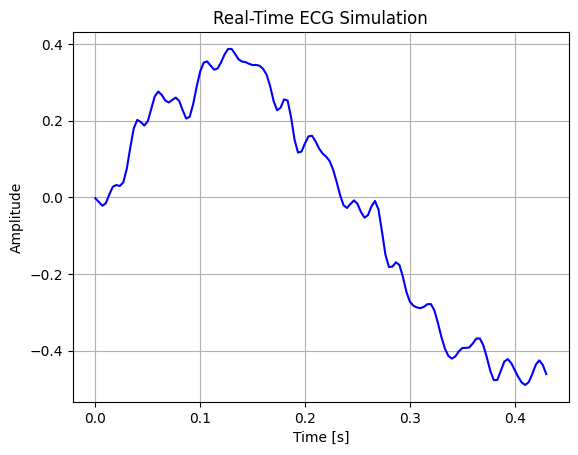

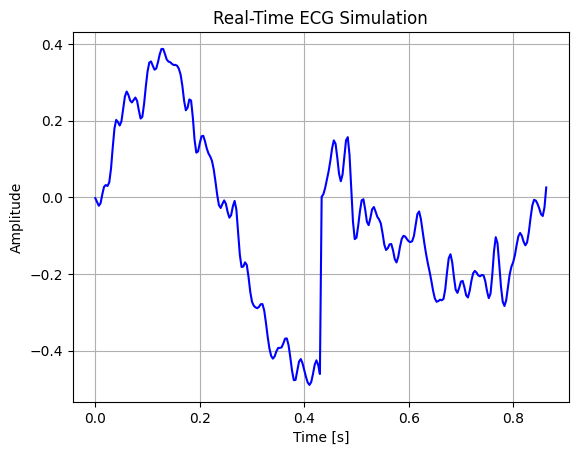

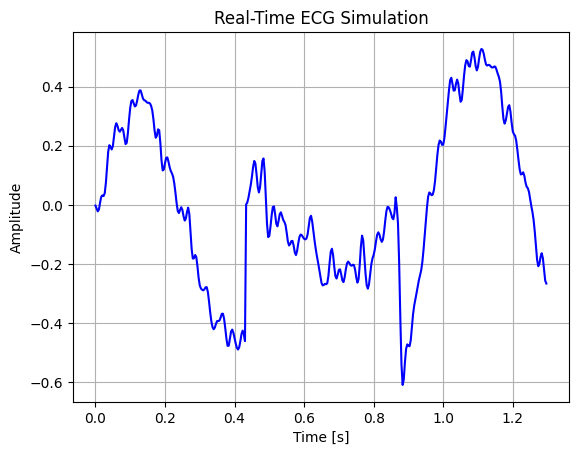

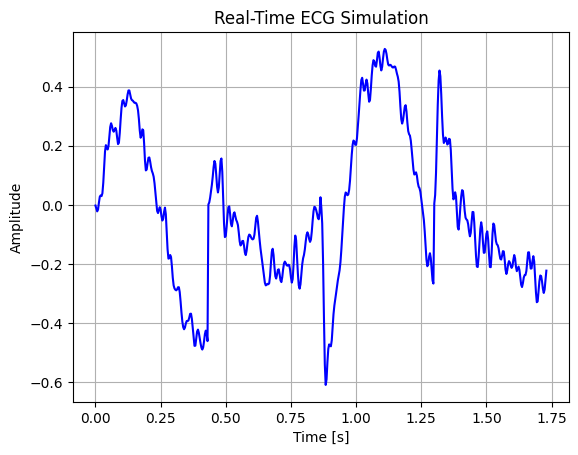

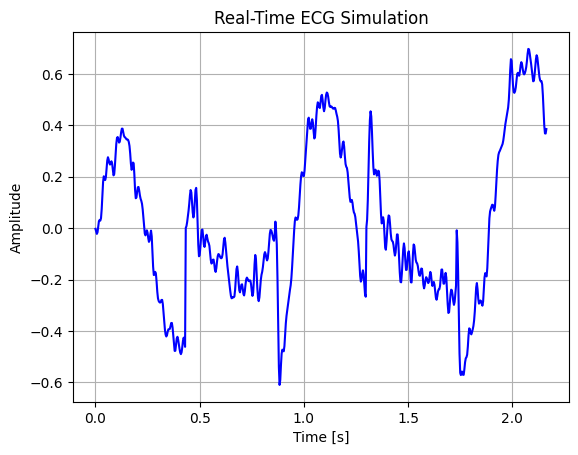

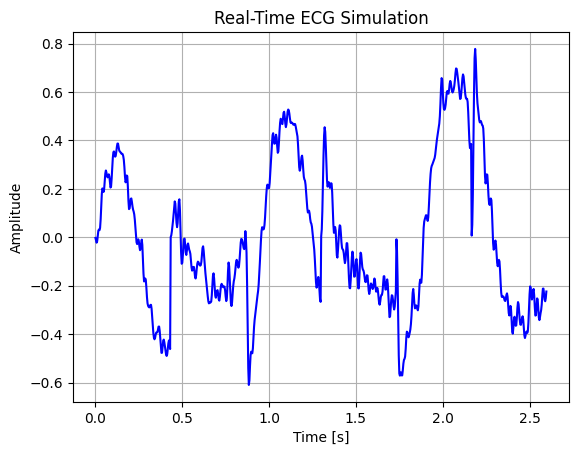

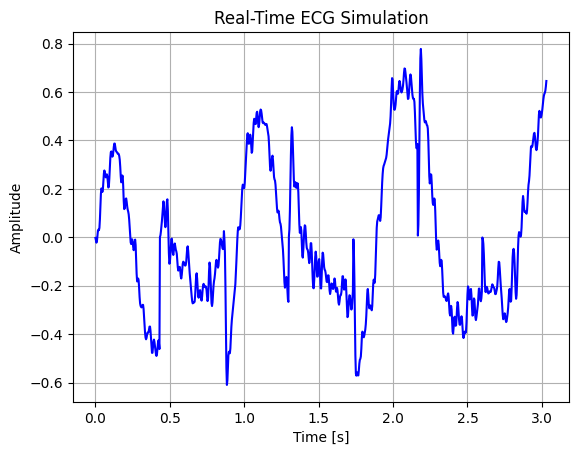

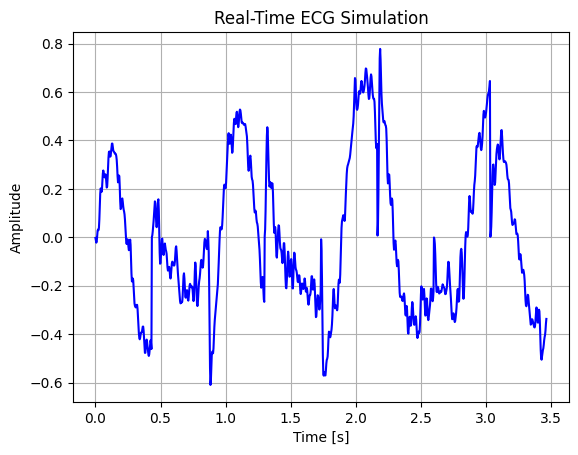

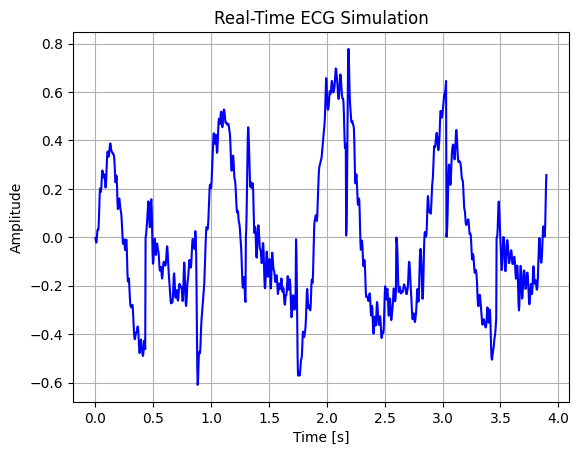

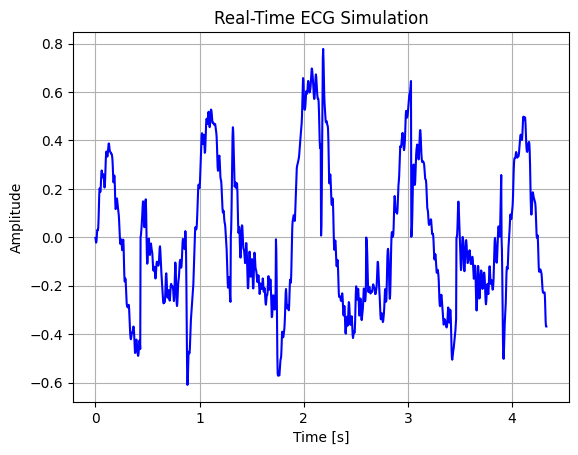

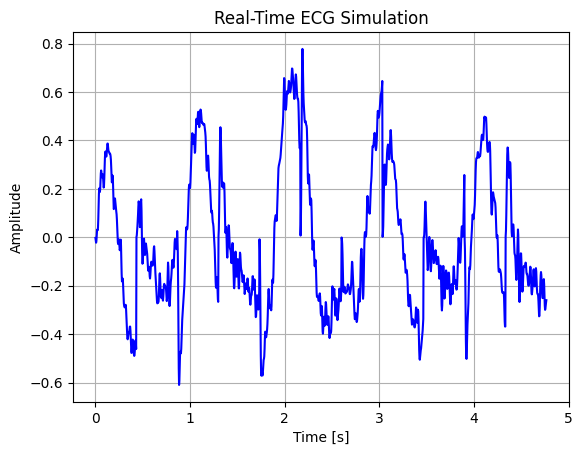

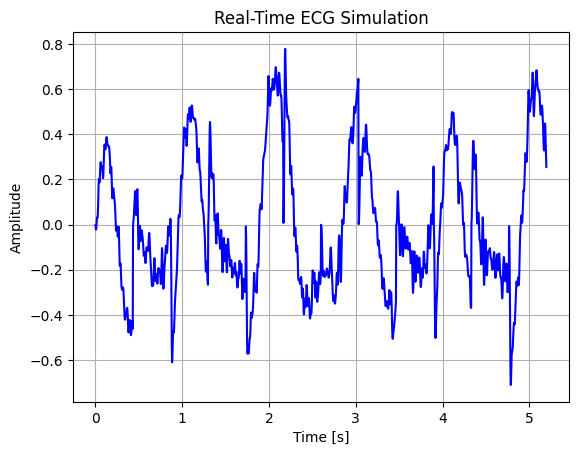

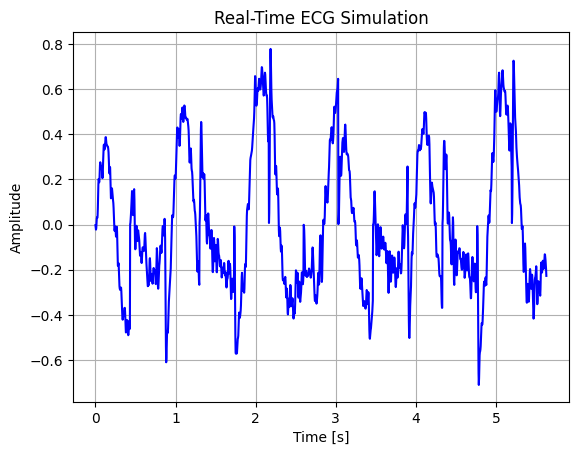

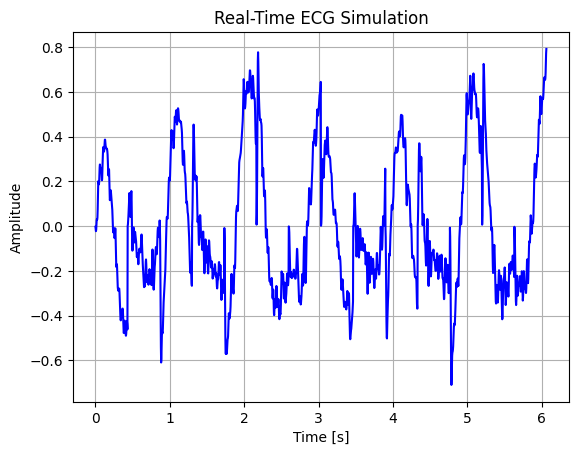

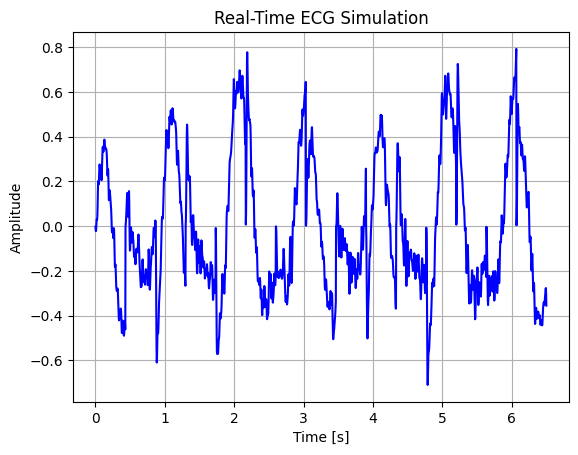

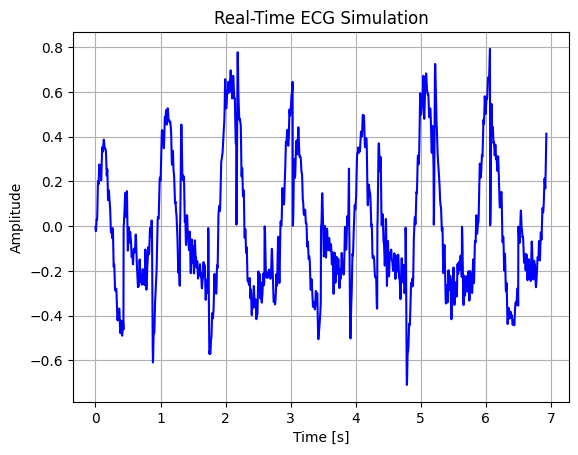

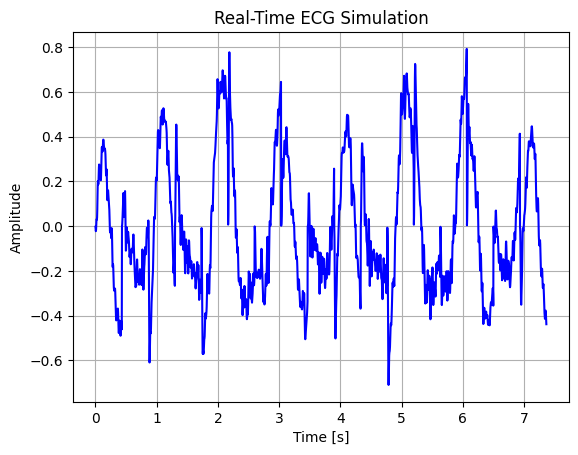

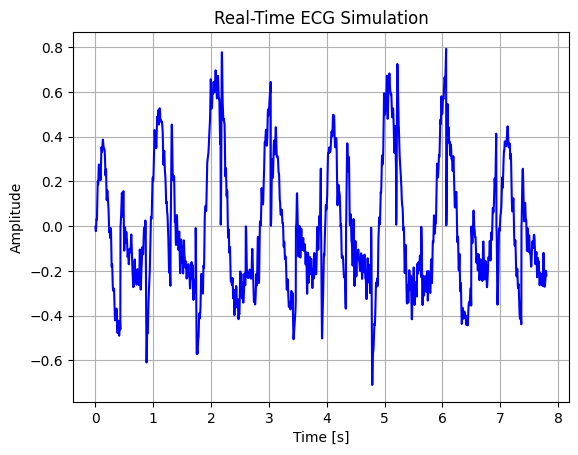

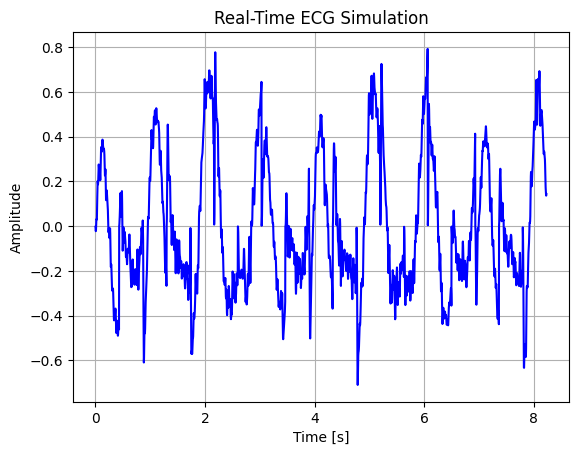

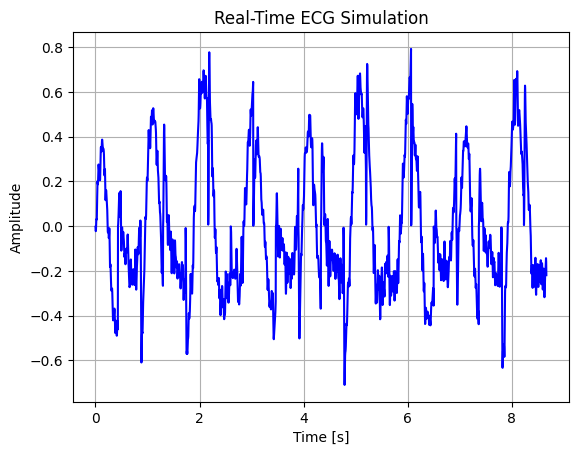

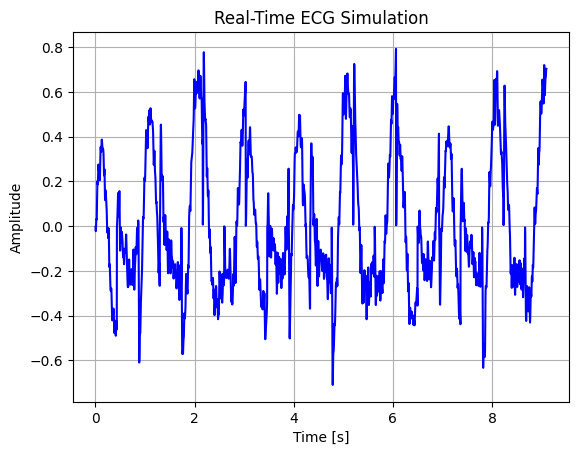

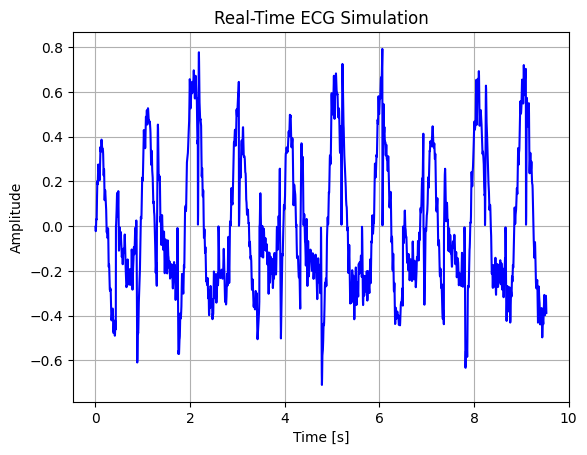

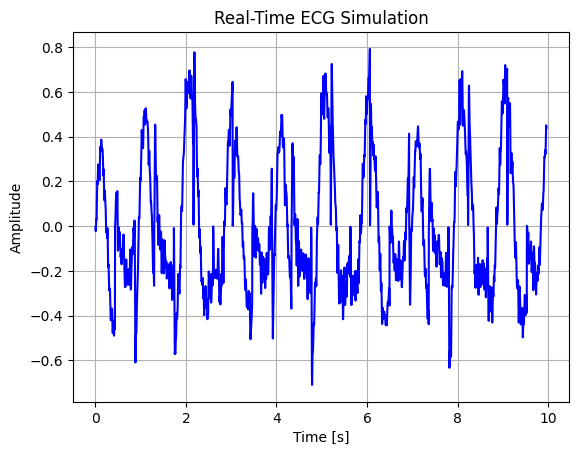

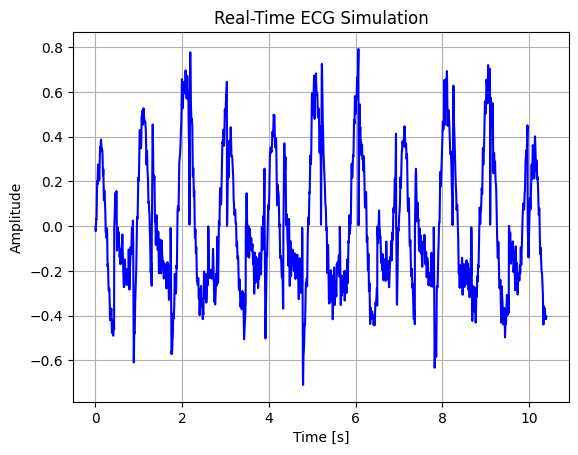

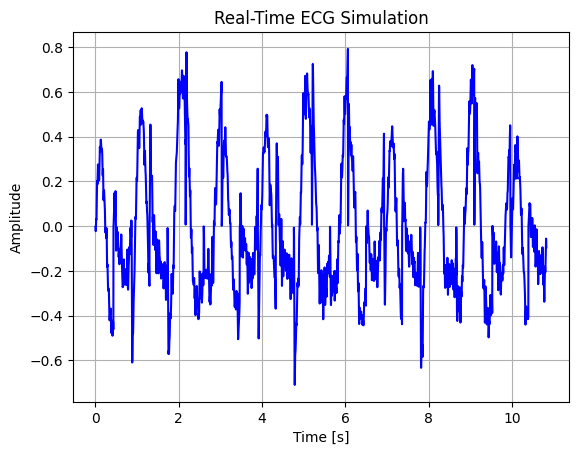

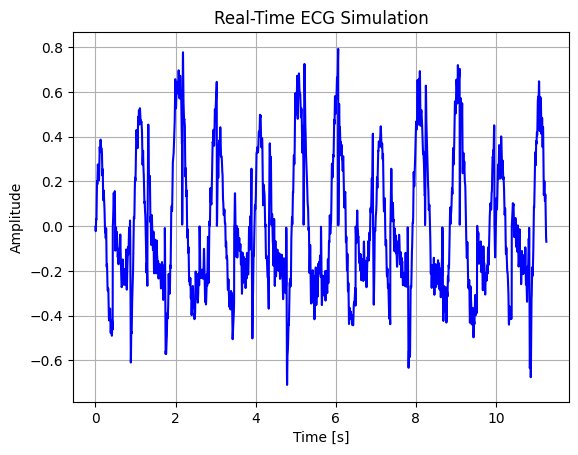

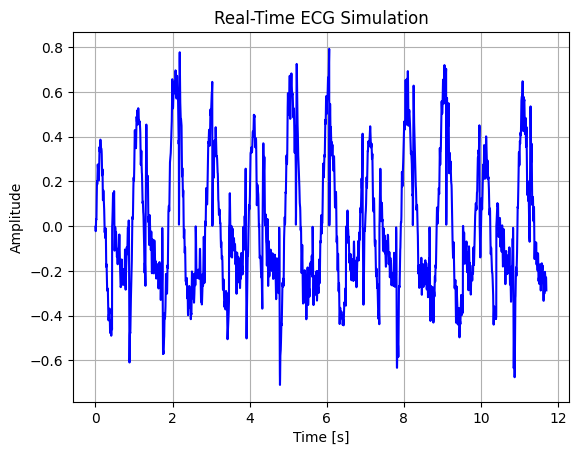

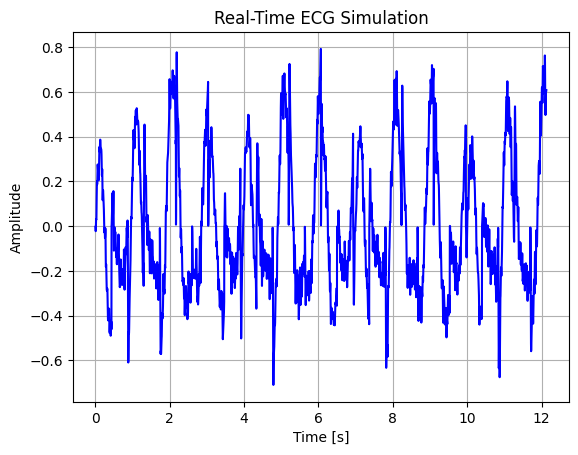

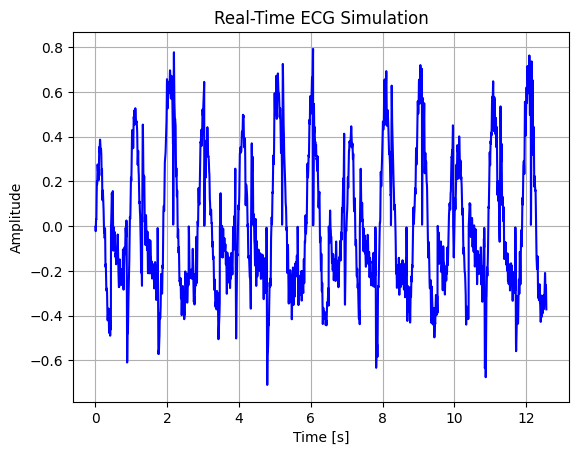

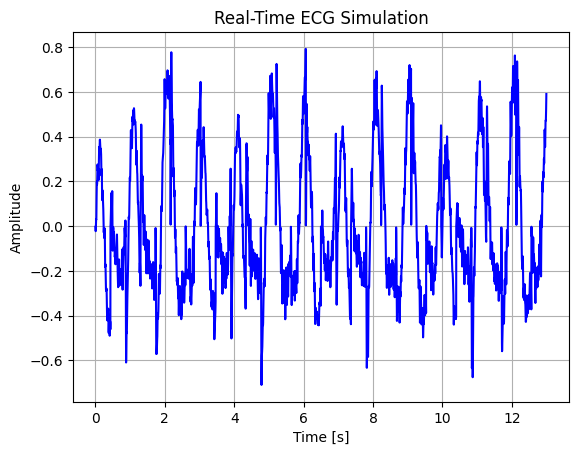

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate/60 * t) \
        + 0.2 * np.sin(2 * np.pi * 2 * heart_rate/60 * t) \
        + 0.1 * np.random.randn(len(t))  
    return t, ecg

def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

def simulate_real_time_processing(ecg_signal, fs, block_size):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs

    processed_signal = []
    t_axis = []

    print("Simulating real-time ECG filtering...")

    for i in range(num_blocks):
        block = ecg_signal[i * block_size:(i + 1) * block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i * block_size, (i + 1) * block_size) / fs)

        plt.clf()
        plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation")
        plt.grid(True)
        plt.pause(0.01)

        time.sleep(delay)  

    plt.show()

fs = 300               
duration = 13          
block_size = 130      
t, ecg = synthetic_ecg(fs, duration)
simulate_real_time_processing(ecg, fs, block_size)


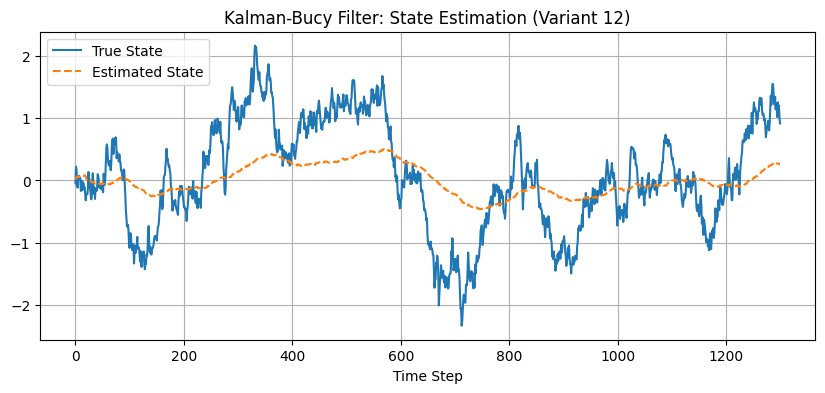

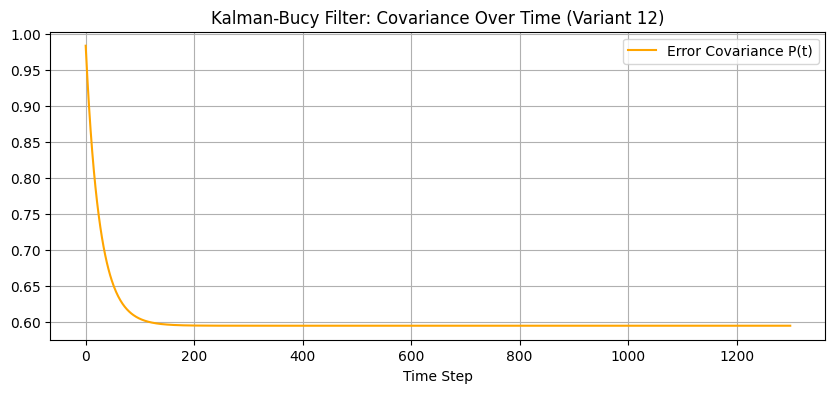

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01     
T = 13         
N = int(T / dt)

A = -1.1
C = 1
Q = 1.7
R = 0.9
P = 1.0 

x_true = 0.0
x_hat = 0.0

x_history = []
xhat_history = []
P_history = []

for _ in range(N):
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true) + w
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    K = P * C / R
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))
    P += dt * (2 * A * P + Q - K * C * P)

    x_history.append(x_true)
    xhat_history.append(x_hat)
    P_history.append(P)

plt.figure(figsize=(10, 4))
plt.plot(x_history, label="True State")
plt.plot(xhat_history, label="Estimated State", linestyle="--")
plt.xlabel("Time Step")
plt.title("Kalman-Bucy Filter: State Estimation")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(P_history, label="Error Covariance P(t)", color='orange')
plt.xlabel("Time Step")
plt.title("Kalman-Bucy Filter: Covariance Over Time")
plt.grid()
plt.legend()
plt.show()


# **Conclusion**
Filtering the ECG in 130-sample frames introduces about 0.433 s of delay (block size ÷ sampling rate) but effectively removes frequencies outside 0.5–40 Hz. The continuous Kalman–Bucy filter quickly tracks the true state despite both process and measurement noise, and its error covariance converges to the theoretical steady-state value. These results show that simple block-based filtering and continuous estimation can provide reliable, low-complexity solutions for real-time signal processing tasks.